<a href="https://colab.research.google.com/github/ben45123/AWS-Lambda-Research/blob/main/BehavioralMobileAppSuccessAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd

# Define the file path for your Excel dataset in Google Colab
file_path = '/content/mobile-app-user-dataset.xlsx'

# Load the dataset from the Excel file
df = pd.read_excel(file_path)

# Display the first 5 rows of the DataFrame to get an initial look at the data
df.head()


,id,date,surveyRespStatus,mobileDeviceManufacturer,mobileDeviceMain,appUse,appStore,appStoreFreq,monthlyDownloads,appSearch,...,pExtroverted,pCritical,pDependable,pAnxious,pOpenness,pReserved,pSympathetic,pDisorganized,pCalm,pConventional
0,0,date,"0=incomplete response, 1=complete response, 2=...",What mobile device do you use? Manufacturer name,What mobile device do you use?-Model name and ...,Do you use apps?,Which app store do you use?,How frequently do you visit the app store to l...,"On average, how many apps do you download a mo...",When do you look for apps? When feeling: depre...,...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...
1,2,2012-09-26 00:00:00,1,Apple,iPhone 4S,Yes,Apple App Store,4,4,"task,boredom,entertained,knowledge",...,6,3,7,2,6,3,4,3,4,4
2,3,2012-09-26 00:00:00,1,Apple,2,Yes,Apple App Store,7,3,"boredom,knowledge",...,4,4,5,2,3,3,5,3,5,3
3,4,2012-09-26 00:00:00,1,Samsung,galaxy Y,Yes,Google Play Store,2,1,task,...,4,3,6,3,5,5,5,2,5,3
4,5,2012-09-27 00:00:00,1,Apple,iphone 4,Yes,Apple App Store,5,2,"task,boredom,knowledge",...,2,6,4,3,6,5,7,3,5,3


In [ ]:
# Display basic information about the DataFrame to check data types and missing values
df.info()

# Get summary statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6948 entries, 0 to 6947
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   id                             6948 non-null   int64 
 1   date                           6948 non-null   object
 2   surveyRespStatus               6948 non-null   object
 3   mobileDeviceManufacturer       5729 non-null   object
 4   mobileDeviceMain               5842 non-null   object
 5   appUse                         5842 non-null   object
 6   appStore                       5846 non-null   object
 7   appStoreFreq                   5637 non-null   object
 8   monthlyDownloads               5637 non-null   object
 9   appSearch                      5498 non-null   object
 10  findApps                       5634 non-null   object
 11  chooseApps                     5400 non-null   object
 12  appDownload                    5402 non-null   object
 13  app

,id
count,6948.000000
mean,5315.759787
std,2931.462906
min,0.000000
25%,2964.750000
50%,5392.500000
75%,7913.250000
max,10208.000000


In [ ]:
# Define the list of income attribute columns to drop
income_cols = ['incomeAUD', 'incomeBRL', 'incomeGBP', 'incomeCDL', 'incomeCNY',
               'incomeEURO', 'incomeINR', 'incomeJPY', 'incomeMXN', 'incomeRUB',
               'incomeKRW', 'incomeUSD']

# Drop the income columns from the valid responses DataFrame
df = df.drop(columns=income_cols)

# Verify that the columns have been removed by printing the remaining columns
print("Remaining columns after dropping income attributes:")
print(df.columns)

Remaining columns after dropping income attributes:
Index(['id', 'date', 'surveyRespStatus', 'mobileDeviceManufacturer',
       'mobileDeviceMain', 'appUse', 'appStore', 'appStoreFreq',
       'monthlyDownloads', 'appSearch', 'findApps', 'chooseApps',
       'appDownload', 'appSpend', 'appSpendTop-orig-DONOTUSE',
       'appSpendTop-converted', 'appSpendTop-appName', 'appSpendTop-reason',
       'appSpendTop-bestWorseFeatures', 'appSpendTop-monthlySpend',
       'rateReason', 'appAbandon', 'appType', 'gender', 'age', 'maritalStatus',
       'nationality', 'currentCountry', 'firstLanguage', 'ethnicity',
       'education', 'educationYears', 'disabilityStatus', 'employment',
       'occupation', 'currency', 'pExtroverted', 'pCritical', 'pDependable',
       'pAnxious', 'pOpenness', 'pReserved', 'pSympathetic', 'pDisorganized',
       'pCalm', 'pConventional'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6948 entries, 0 to 6947
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   id                             6948 non-null   int64 
 1   date                           6948 non-null   object
 2   surveyRespStatus               6948 non-null   object
 3   mobileDeviceManufacturer       5729 non-null   object
 4   mobileDeviceMain               5842 non-null   object
 5   appUse                         5842 non-null   object
 6   appStore                       5846 non-null   object
 7   appStoreFreq                   5637 non-null   object
 8   monthlyDownloads               5637 non-null   object
 9   appSearch                      5498 non-null   object
 10  findApps                       5634 non-null   object
 11  chooseApps                     5400 non-null   object
 12  appDownload                    5402 non-null   object
 13  app

In [ ]:
# Mapping dictionaries for ordinal survey variables
appStoreFreq_map = {
    1: "Never",
    2: "Less than once a month",
    3: "Once a month",
    4: "More than once a month",
    5: "Once a week",
    6: "More than once a week",
    7: "Once a day",
    8: "Several times a day",
    9: "Other"
}

monthlyDownloads_map = {
    1: "[0 - 1]",
    2: "[2 - 5]",
    3: "[6 - 10]",
    4: "[11 - 20]",
    5: "[21 - 30]",
    6: "[More than 30]"
}

# Convert the columns to numeric and create new descriptive columns.
df['appStoreFreq_numeric'] = pd.to_numeric(df['appStoreFreq'], errors='coerce')
df['appStoreFreq_desc'] = df['appStoreFreq_numeric'].map(appStoreFreq_map)

df['monthlyDownloads_numeric'] = pd.to_numeric(df['monthlyDownloads'], errors='coerce')
df['monthlyDownloads_desc'] = df['monthlyDownloads_numeric'].map(monthlyDownloads_map)

# Display the new columns to verify the conversion and mapping:
print("App Store Frequency (Original, Numeric, Description):")
print(df[['appStoreFreq', 'appStoreFreq_numeric', 'appStoreFreq_desc']].head())

print("\nMonthly Downloads (Original, Numeric, Description):")
print(df[['monthlyDownloads', 'monthlyDownloads_numeric', 'monthlyDownloads_desc']].head())


App Store Frequency (Original, Numeric, Description):
                                        appStoreFreq  appStoreFreq_numeric  \
0  How frequently do you visit the app store to l...                   NaN   
1                                                  4                   4.0   
2                                                  7                   7.0   
3                                                  2                   2.0   
4                                                  5                   5.0   

        appStoreFreq_desc  
0                     NaN  
1  More than once a month  
2              Once a day  
3  Less than once a month  
4             Once a week  

Monthly Downloads (Original, Numeric, Description):
                                    monthlyDownloads  \
0  On average, how many apps do you download a mo...   
1                                                  4   
2                                                  3   
3                               

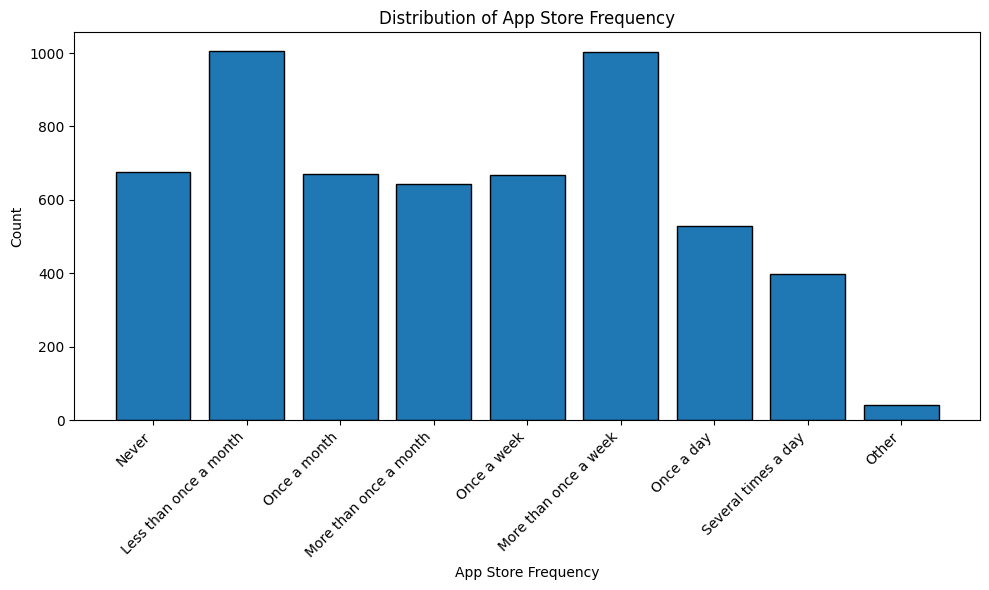

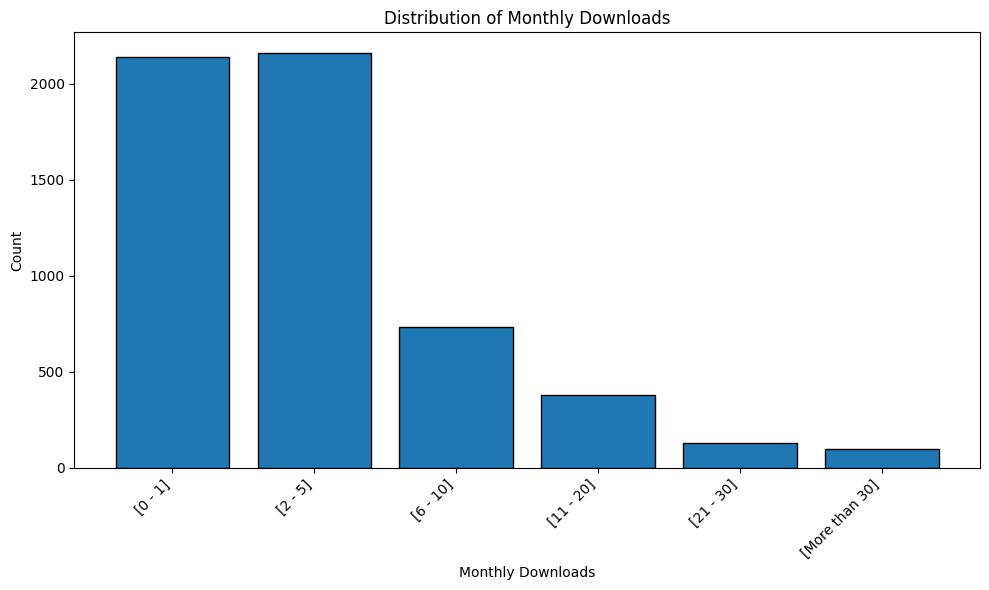


App Store Frequency Statistics:
Mean: 4.24
Median: 4.0

Monthly Downloads Statistics:
Mean: 2.02
Median: 2.0


In [ ]:
import matplotlib.pyplot as plt

# Create an ordered list of labels based on the mapping dictionaries:
ordered_appStoreFreq = [appStoreFreq_map[k] for k in sorted(appStoreFreq_map.keys())]
ordered_monthlyDownloads = [monthlyDownloads_map[k] for k in sorted(monthlyDownloads_map.keys())]

# Count the occurrences for each descriptive category.
# value_counts() ignores NaN values by default.
appStoreFreq_counts = df['appStoreFreq_desc'].value_counts(dropna=True).reindex(ordered_appStoreFreq)
# Replace NaN with 0 in case some categories are missing.
appStoreFreq_counts.fillna(0, inplace=True)

monthlyDownloads_counts = df['monthlyDownloads_desc'].value_counts(dropna=True).reindex(ordered_monthlyDownloads)
monthlyDownloads_counts.fillna(0, inplace=True)

# Plot the distribution for App Store Frequency
plt.figure(figsize=(10, 6))
plt.bar(appStoreFreq_counts.index, appStoreFreq_counts.values, edgecolor='black')
plt.xlabel("App Store Frequency")
plt.ylabel("Count")
plt.title("Distribution of App Store Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the distribution for Monthly Downloads
plt.figure(figsize=(10, 6))
plt.bar(monthlyDownloads_counts.index, monthlyDownloads_counts.values, edgecolor='black')
plt.xlabel("Monthly Downloads")
plt.ylabel("Count")
plt.title("Distribution of Monthly Downloads")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Compute the mean and median for App Store Frequency (numeric) and Monthly Downloads (numeric)
mean_appStoreFreq = df['appStoreFreq_numeric'].mean()
median_appStoreFreq = df['appStoreFreq_numeric'].median()

mean_monthlyDownloads = df['monthlyDownloads_numeric'].mean()
median_monthlyDownloads = df['monthlyDownloads_numeric'].median()

print()

# Print out the statistics for App Store Frequency
print("App Store Frequency Statistics:")
print("Mean:", round(mean_appStoreFreq, 2))
print("Median:", round(median_appStoreFreq, 2))

print("\nMonthly Downloads Statistics:")
print("Mean:", round(mean_monthlyDownloads, 2))
print("Median:", round(median_monthlyDownloads, 2))


In [ ]:
# Convert age and educationYears to numeric values (if possible)
df['age_numeric'] = pd.to_numeric(df['age'], errors='coerce')
df['educationYears_numeric'] = pd.to_numeric(df['educationYears'], errors='coerce')

In [ ]:
# Create a copy of the DataFrame for this analysis
df_exploded = df.copy()

# Split the 'appType' column into a list of individual app types
df_exploded['appType_list'] = df_exploded['appType'].str.split(',')

# Explode the list so that each app type becomes its own row
df_exploded = df_exploded.explode('appType_list')

# Remove extra whitespace from each app type (if any)
df_exploded['appType_list'] = df_exploded['appType_list'].str.strip()

# Convert 'monthlyDownloads' to numeric if not already done (again, using errors='coerce')
df_exploded['monthlyDownloads_numeric'] = pd.to_numeric(df_exploded['monthlyDownloads'], errors='coerce')

# Group by the individual app type and calculate the average monthly downloads
avg_downloads_by_type = df_exploded.groupby('appType_list')['monthlyDownloads_numeric'].mean().sort_values(ascending=False)

# Display the results
print("Average Monthly Downloads by Individual App Type:")
print(avg_downloads_by_type)


Average Monthly Downloads by Individual App Type:
appType_list
business                                2.751079
catalogues                              2.716049
reference                               2.682446
medical                                 2.682281
food                                    2.628979
sports                                  2.617411
finance                                 2.601671
education                               2.589155
entertainment                           2.550164
lifestyle                               2.546584
productivity                            2.536688
travel                                  2.490944
books                                   2.448509
health                                  2.440694
news                                    2.411552
music                                   2.383595
photoVideo                              2.376969
navigation                              2.376896
utilities                               2.277888
games 

In [ ]:
# Remove rows where appType_list equals the unwanted prompt text
df_exploded = df_exploded[df_exploded['appType_list'] != "Which types of apps do you download?"]

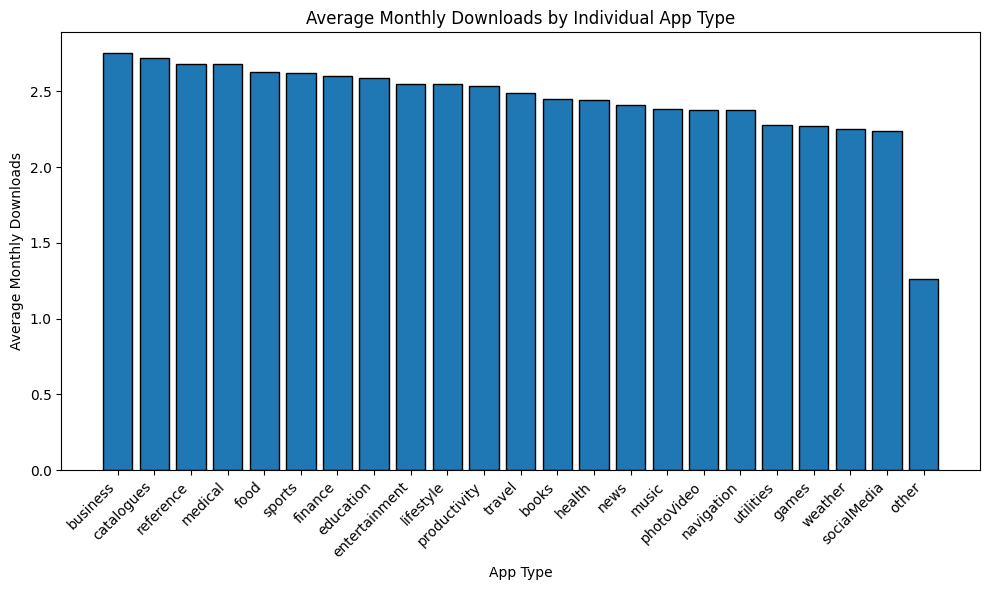

In [ ]:
# Group by the individual app type and calculate the average monthly downloads
avg_downloads_by_type = df_exploded.groupby('appType_list')['monthlyDownloads_numeric'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(avg_downloads_by_type.index, avg_downloads_by_type.values, edgecolor='black')
plt.xlabel("App Type")
plt.ylabel("Average Monthly Downloads")
plt.title("Average Monthly Downloads by Individual App Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Define the personality columns (make sure these names match those in your DataFrame)
personality_cols = [
    'pExtroverted', 'pCritical', 'pDependable', 'pAnxious',
    'pOpenness', 'pReserved', 'pSympathetic', 'pDisorganized',
    'pCalm', 'pConventional'
]


In [ ]:
# Ensure that personality columns are numeric
for col in personality_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Also ensure that monthlyDownloads, appStoreFreq, and age have been converted properly:
df['monthlyDownloads_numeric'] = pd.to_numeric(df['monthlyDownloads'], errors='coerce')
df['appStoreFreq_numeric'] = pd.to_numeric(df['appStoreFreq'], errors='coerce')
df['age_numeric'] = pd.to_numeric(df['age'], errors='coerce')


In [ ]:
import statsmodels.api as sm
import pandas as pd

# Define the personality columns that are present in your data
personality_cols = [
    'pExtroverted', 'pCritical', 'pDependable', 'pAnxious',
    'pOpenness', 'pReserved', 'pSympathetic', 'pDisorganized',
    'pCalm', 'pConventional'
]

# Ensure that the personality columns and the key numeric variables are indeed numeric
for col in personality_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['monthlyDownloads_numeric'] = pd.to_numeric(df['monthlyDownloads'], errors='coerce')
df['appStoreFreq_numeric'] = pd.to_numeric(df['appStoreFreq'], errors='coerce')

# Create the list of regression variables: our dependent variable and the predictors
regression_vars = ['monthlyDownloads_numeric', 'appStoreFreq_numeric'] + personality_cols

# Create a working DataFrame with these columns and drop rows with missing values
regression_df = df[regression_vars].dropna()

# Define the dependent variable (y) and independent variables (X)
y = regression_df['monthlyDownloads_numeric']
X = regression_df[['appStoreFreq_numeric'] + personality_cols]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())


                               OLS Regression Results                               
Dep. Variable:     monthlyDownloads_numeric   R-squared:                       0.428
Model:                                  OLS   Adj. R-squared:                  0.427
Method:                       Least Squares   F-statistic:                     327.2
Date:                      Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                              00:25:27   Log-Likelihood:                -6078.0
No. Observations:                      4823   AIC:                         1.218e+04
Df Residuals:                          4811   BIC:                         1.226e+04
Df Model:                                11                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Convert monthly downloads to numeric
df['monthlyDownloads_numeric'] = pd.to_numeric(df['monthlyDownloads'], errors='coerce')

# Define the list of categorical predictors to include
cat_vars = ['maritalStatus', 'nationality', 'currentCountry', 'firstLanguage',
            'ethnicity', 'education', 'disabilityStatus', 'employment',
            'occupation', 'currency']

# Filter the list to include only columns that actually exist in the DataFrame
cat_vars = [col for col in cat_vars if col in df.columns]
print("Using categorical predictors:", cat_vars)

# For each categorical variable, limit the number of categories to reduce dimensionality
# Group rare categories into 'Other'
top_n = 10  # Keep only top N categories for each variable
for col in cat_vars:
    # Count frequency of each category
    value_counts = df[col].value_counts()
    # Keep only the top N categories
    top_categories = value_counts.nlargest(top_n).index.tolist()
    # Replace rare categories with 'Other'
    df[col + '_grouped'] = df[col].apply(lambda x: x if pd.notna(x) and x in top_categories else 'Other')

# Use the grouped columns for creating dummies
grouped_cat_vars = [col + '_grouped' for col in cat_vars]
df_dummies = pd.get_dummies(df[grouped_cat_vars], drop_first=True)

# Combine the dependent variable with the dummy predictors
clean_df = pd.concat([df['monthlyDownloads_numeric'], df_dummies], axis=1).dropna()

# Double check that all columns are numeric
for col in clean_df.columns:
    if clean_df[col].dtype == 'object':
        print(f"Column {col} is still of object type and needs conversion")
        # For dummy variables, they should be 0s and 1s
        clean_df[col] = pd.to_numeric(clean_df[col], errors='coerce')

# Another check to ensure all is numeric - more thorough check
for col in clean_df.columns:
    # Explicitly check column type and try to convert
    if clean_df[col].dtype == 'object' or pd.api.types.is_object_dtype(clean_df[col]):
        print(f"Converting column {col} from object type to numeric")
        clean_df[col] = pd.to_numeric(clean_df[col], errors='coerce')

# Remove any columns that are still object type after conversion attempts
non_numeric_cols = [col for col in clean_df.columns if pd.api.types.is_object_dtype(clean_df[col])]
if non_numeric_cols:
    print(f"Warning: Removing these non-numeric columns: {non_numeric_cols}")
    clean_df = clean_df.drop(columns=non_numeric_cols)

# Check for and remove any rows with NaN values
clean_df = clean_df.dropna()
print(f"Dataset shape after cleaning: {clean_df.shape}")

# Look at data types once more
print("Column data types after processing:")
print(clean_df.dtypes.value_counts())

# Define dependent (y) and independent variables (X)
y = clean_df['monthlyDownloads_numeric']
X = clean_df.drop(columns=['monthlyDownloads_numeric'])

# Add a constant term for the intercept
X = sm.add_constant(X)

# Use a safer approach to check for multicollinearity without matrix_rank
# Just check if there are any perfectly correlated columns
correlation_matrix = X.corr()
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:  # Threshold for high correlation
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

if high_corr_pairs:
    print(f"Warning: Found {len(high_corr_pairs)} pairs of highly correlated variables.")
    for var1, var2 in high_corr_pairs[:5]:  # Show first 5 pairs
        print(f"  - {var1} and {var2}")

    # Optional: remove one from each highly correlated pair
    cols_to_drop = [pair[1] for pair in high_corr_pairs]  # Drop the second variable from each pair
    print(f"Removing {len(cols_to_drop)} variables due to high correlation")
    X = X.drop(columns=cols_to_drop, errors='ignore')

# Make sure X and y are of float type to avoid numerical issues
X = X.astype(float)
y = y.astype(float)

# Verify that X doesn't have any remaining problematic values
print("Checking X for NaN or inf values")
has_nan = np.isnan(X).any().any()
has_inf = np.isinf(X).any().any()
if has_nan:
    print("Warning: X still contains NaN values. Dropping rows with NaN.")
    X = X.dropna()
    y = y.loc[X.index]
if has_inf:
    print("Warning: X contains infinite values. Replacing with large values.")
    X = X.replace([np.inf, -np.inf], [1e10, -1e10])

# For safety, limit the number of predictors based on sample size
n_samples = len(y)
max_predictors = int(n_samples / 10)  # Rule of thumb: at least 10 samples per predictor
if X.shape[1] > max_predictors:
    print(f"Warning: Too many predictors ({X.shape[1]}) for sample size ({n_samples}).")
    print(f"Limiting to {max_predictors} predictors based on correlation with target.")

    # Calculate correlation with target for each feature
    correlations = []
    for col in X.columns:
        if col != 'const':  # Skip the constant term
            corr = np.abs(X[col].corr(y))
            correlations.append((col, corr))

    # Sort by absolute correlation and keep top features
    correlations.sort(key=lambda x: x[1], reverse=True)
    keep_cols = ['const'] + [col for col, _ in correlations[:max_predictors-1]]

    print(f"Keeping {len(keep_cols)} columns including intercept")
    X = X[keep_cols]

try:
    # Fit the OLS regression model with a more robust approach
    print(f"Fitting regression model with {X.shape[1]} predictors and {len(y)} samples")
    model = sm.OLS(y, X).fit()

    # Print the summary of the regression results
    print(model.summary())

    # Print the predictors with highest t-values
    print("\nTop 10 predictors by absolute t-value:")
    t_values = []
    for var in model.params.index:
        if var != 'const':  # Exclude the constant term
            # Calculate t-value (coefficient / std error)
            t_value = model.params[var] / model.bse[var]
            p_value = model.pvalues[var]
            coefficient = model.params[var]
            t_values.append((var, t_value, p_value, coefficient))

    # Sort by absolute t-value
    t_values.sort(key=lambda x: abs(x[1]), reverse=True)

    # Print top 10 predictors by t-value
    for i, (var, t_val, p_val, coef) in enumerate(t_values[:10]):
        print(f"{i+1}. {var}: t-value = {t_val:.4f}, p-value = {p_val:.4f}, coefficient = {coef:.4f}")

    # Also print the most significant categorical predictors
    print("\nMost significant categorical predictors (p < 0.05):")
    significant_predictors = []
    for var in model.pvalues.index:
        if var != 'const' and model.pvalues[var] < 0.05:
            significant_predictors.append((var, model.params[var], model.pvalues[var]))

    # Sort by absolute coefficient value
    significant_predictors.sort(key=lambda x: abs(x[1]), reverse=True)

    # Print top 10 most impactful significant predictors
    for i, (var, coef, pval) in enumerate(significant_predictors[:10]):
        print(f"{var}: coefficient = {coef:.4f}, p-value = {pval:.4f}")

    # Calculate and print model quality metrics
    print("\nModel Quality Metrics:")
    print(f"R-squared: {model.rsquared:.4f}")
    print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")
    print(f"F-statistic: {model.fvalue:.4f}")
    print(f"Prob(F-statistic): {model.f_pvalue:.4f}")
    print(f"AIC: {model.aic:.4f}")
    print(f"BIC: {model.bic:.4f}")

except Exception as e:
    print(f"Error fitting model: {e}")
    print("\nAttempting alternative approach with regularization...")

    # Try Ridge regression as an alternative (handles multicollinearity better)
    from sklearn.linear_model import Ridge
    from sklearn.preprocessing import StandardScaler

    # Scale the features for better numerical stability
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Fit Ridge regression
    ridge = Ridge(alpha=1.0)  # Alpha parameter controls regularization strength
    ridge.fit(X_scaled, y)

    # Print coefficients with t-values
    print("\nRidge Regression Results:")

    # Calculate predictions and residuals
    y_pred = ridge.predict(X_scaled)
    residuals = y - y_pred

    # Calculate MSE and standard error
    n = len(y)
    p = X_scaled.shape[1]
    mse = np.sum(residuals**2) / (n - p - 1)

    # Create a DataFrame to store results
    import pandas as pd
    results_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': ridge.coef_
    })

    # Calculate standard errors and t-values
    # Note: This is an approximation for Ridge regression
    from sklearn.utils import resample

    # Bootstrap to estimate standard errors
    n_bootstrap = 100
    bootstrap_coefs = []

    for _ in range(n_bootstrap):
        # Create bootstrap sample
        indices = resample(range(n), n_samples=n)
        X_boot = X_scaled[indices]
        y_boot = y.iloc[indices].values

        # Fit model
        ridge_boot = Ridge(alpha=1.0)
        ridge_boot.fit(X_boot, y_boot)

        # Store coefficients
        bootstrap_coefs.append(ridge_boot.coef_)

    # Calculate standard error as standard deviation of bootstrap coefficients
    bootstrap_coefs = np.vstack(bootstrap_coefs)
    std_errors = bootstrap_coefs.std(axis=0)

    # Add to results DataFrame
    results_df['Std_Error'] = std_errors
    results_df['t_value'] = results_df['Coefficient'] / results_df['Std_Error']

    # Sort by absolute t-value
    results_df['abs_t_value'] = results_df['t_value'].abs()
    results_df = results_df.sort_values('abs_t_value', ascending=False)

    # Print top 10 predictors by t-value
    print("Top 10 features by absolute t-value:")
    for i, row in results_df.head(10).iterrows():
        print(f"{row['Feature']}: coefficient = {row['Coefficient']:.4f}, t-value = {row['t_value']:.4f}")

Using categorical predictors: ['maritalStatus', 'nationality', 'currentCountry', 'firstLanguage', 'ethnicity', 'education', 'disabilityStatus', 'employment', 'occupation', 'currency']
Dataset shape after cleaning: (5636, 85)
Column data types after processing:
bool       84
float64     1
Name: count, dtype: int64
  - maritalStatus_grouped_Other and disabilityStatus_grouped_Other
  - maritalStatus_grouped_Other and employment_grouped_Other
  - nationality_grouped_Brazilian and currentCountry_grouped_Brazil
  - nationality_grouped_Brazilian and firstLanguage_grouped_Portuguese
  - nationality_grouped_Brazilian and currency_grouped_BRL
Removing 24 variables due to high correlation
Checking X for NaN or inf values
Fitting regression model with 70 predictors and 5636 samples
                               OLS Regression Results                               
Dep. Variable:     monthlyDownloads_numeric   R-squared:                       0.142
Model:                                  OLS   Adj

In [ ]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the personality columns
personality_cols = [
    'pExtroverted', 'pCritical', 'pDependable', 'pAnxious',
    'pOpenness', 'pReserved', 'pSympathetic', 'pDisorganized',
    'pCalm', 'pConventional'
]

# Ensure that the personality columns and the dependent variable are numeric
for col in personality_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df['monthlyDownloads_numeric'] = pd.to_numeric(df['monthlyDownloads'], errors='coerce')

# Create a working DataFrame with just personality columns and monthly downloads
personality_df = df[['monthlyDownloads_numeric'] + personality_cols].dropna()

# Print the shape of the working dataframe
print(f"Analysis dataset shape: {personality_df.shape}")

# Calculate correlation matrix between personality traits and downloads
correlation_matrix = personality_df.corr()
print("\nCorrelations between personality traits and monthly downloads:")
print(correlation_matrix['monthlyDownloads_numeric'].sort_values(ascending=False))

# Create a correlation heatmap for visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Personality Traits and Monthly Downloads')
plt.tight_layout()
plt.savefig('personality_correlations.png')
plt.close()

# Define dependent (y) and independent variables (X) for regression
y = personality_df['monthlyDownloads_numeric']
X = personality_df[personality_cols]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the OLS regression model - personality traits only
personality_model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print("\nRegression Model: Personality Traits Only")
print(personality_model.summary())


Analysis dataset shape: (4823, 11)

Correlations between personality traits and monthly downloads:
monthlyDownloads_numeric    1.000000
pExtroverted                0.129548
pOpenness                   0.101576
pCritical                   0.071808
pCalm                       0.061637
pDependable                 0.037355
pSympathetic                0.032008
pDisorganized               0.003073
pReserved                  -0.019016
pConventional              -0.052376
pAnxious                   -0.067673
Name: monthlyDownloads_numeric, dtype: float64

Regression Model: Personality Traits Only
                               OLS Regression Results                               
Dep. Variable:     monthlyDownloads_numeric   R-squared:                       0.032
Model:                                  OLS   Adj. R-squared:                  0.030
Method:                       Least Squares   F-statistic:                     15.96
Date:                      Wed, 02 Apr 2025   Prob (F-statistic)

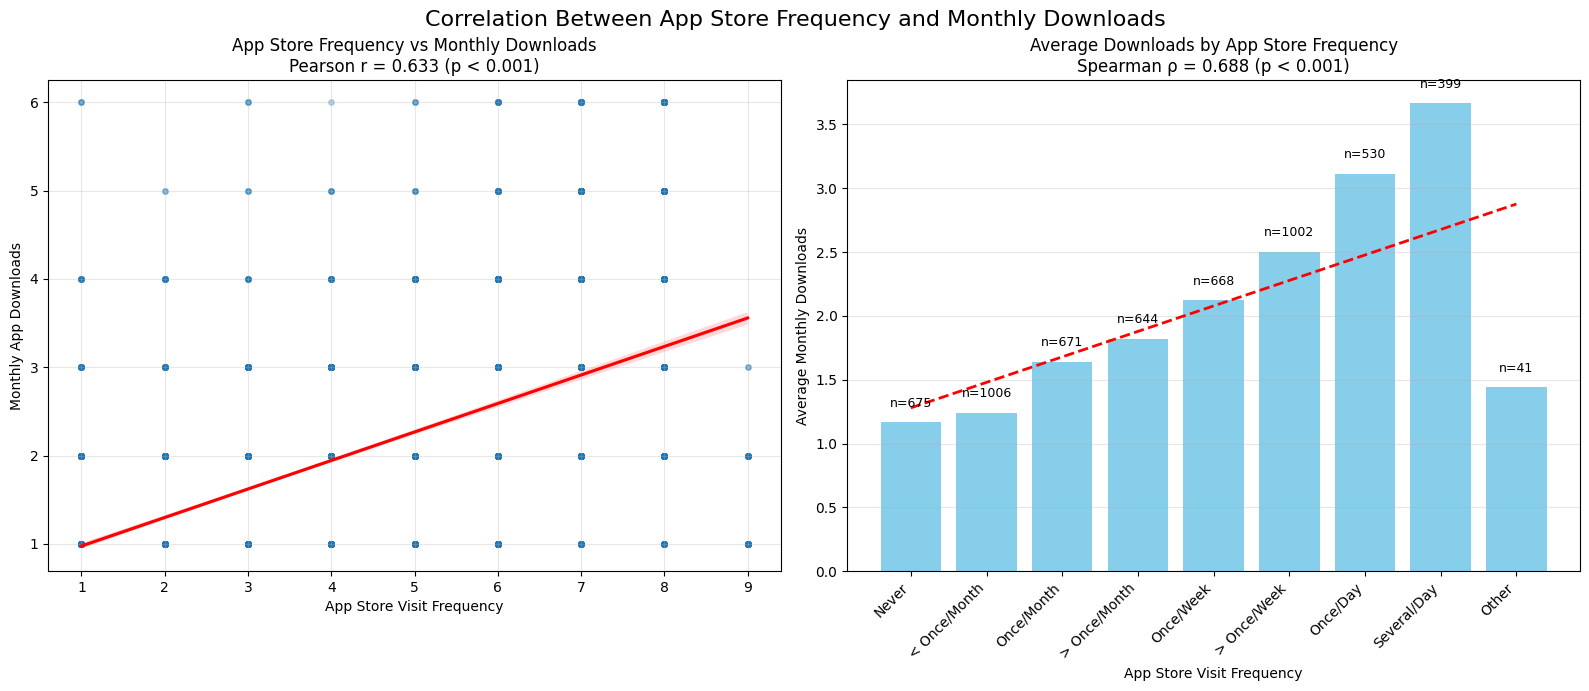

Pearson correlation (linear): r = 0.6333, p-value = 0.0000e+00
Spearman correlation (rank-based): ρ = 0.6877, p-value = 0.0000e+00
Interpretation: These correlations are very strong


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Ensure both variables are numeric
df['appStoreFreq_numeric'] = pd.to_numeric(df['appStoreFreq'], errors='coerce')
df['monthlyDownloads_numeric'] = pd.to_numeric(df['monthlyDownloads'], errors='coerce')

# Create a clean dataset
clean_df = df[['appStoreFreq_numeric', 'monthlyDownloads_numeric']].dropna()

# Calculate correlations
pearson_r, p_value = pearsonr(clean_df['appStoreFreq_numeric'], clean_df['monthlyDownloads_numeric'])
spearman_r, spearman_p = spearmanr(clean_df['appStoreFreq_numeric'], clean_df['monthlyDownloads_numeric'])

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Scatter plot with regression line
sns.regplot(x='appStoreFreq_numeric', y='monthlyDownloads_numeric', data=clean_df,
           scatter_kws={'alpha': 0.3, 's': 15}, line_kws={'color': 'red'}, ax=ax1)
ax1.set_title(f'App Store Frequency vs Monthly Downloads\nPearson r = {pearson_r:.3f} (p < 0.001)', fontsize=12)
ax1.set_xlabel('App Store Visit Frequency')
ax1.set_ylabel('Monthly App Downloads')
ax1.grid(alpha=0.3)

# Calculate average downloads for each app store frequency
avg_downloads = clean_df.groupby('appStoreFreq_numeric')['monthlyDownloads_numeric'].agg(['mean', 'count']).reset_index()
avg_downloads.columns = ['appStoreFreq_numeric', 'mean', 'count']

# Define app store frequency labels
freq_labels = {
    1: "Never",
    2: "< Once/Month",
    3: "Once/Month",
    4: "> Once/Month",
    5: "Once/Week",
    6: "> Once/Week",
    7: "Once/Day",
    8: "Several/Day",
    9: "Other"
}

# Add labels to the dataframe
avg_downloads['label'] = avg_downloads['appStoreFreq_numeric'].map(freq_labels)

# Plot 2: Bar chart with trend line
bars = ax2.bar(avg_downloads['appStoreFreq_numeric'], avg_downloads['mean'], color='skyblue')

# Add a trend line
z = np.polyfit(avg_downloads['appStoreFreq_numeric'], avg_downloads['mean'], 1)
p = np.poly1d(z)
ax2.plot(avg_downloads['appStoreFreq_numeric'], p(avg_downloads['appStoreFreq_numeric']), "r--", linewidth=2)

# Add sample sizes
for i, bar in enumerate(bars):
    height = bar.get_height()
    count = avg_downloads.iloc[i]['count']
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'n={count}', ha='center', va='bottom', fontsize=9)

# Set x-ticks and labels for the bar chart
ax2.set_xticks(avg_downloads['appStoreFreq_numeric'])
ax2.set_xticklabels(avg_downloads['label'], rotation=45, ha='right')
ax2.set_title(f'Average Downloads by App Store Frequency\nSpearman ρ = {spearman_r:.3f} (p < 0.001)', fontsize=12)
ax2.set_xlabel('App Store Visit Frequency')
ax2.set_ylabel('Average Monthly Downloads')
ax2.grid(axis='y', alpha=0.3)

# Add an overall title
plt.suptitle('Correlation Between App Store Frequency and Monthly Downloads', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)

# Save and show
plt.savefig('app_store_correlation_visualization.png')
plt.show()

# Print correlation information
print(f"Pearson correlation (linear): r = {pearson_r:.4f}, p-value = {p_value:.4e}")
print(f"Spearman correlation (rank-based): ρ = {spearman_r:.4f}, p-value = {spearman_p:.4e}")
print(f"Interpretation: These correlations are {'very strong' if abs(pearson_r) > 0.5 else 'moderate' if abs(pearson_r) > 0.3 else 'weak'}")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Create a copy of the DataFrame for this analysis
df_exploded = df.copy()

# Split the 'appType' column into a list of individual app types
df_exploded['appType_list'] = df_exploded['appType'].str.split(',')

# Explode the list so that each app type becomes its own row
df_exploded = df_exploded.explode('appType_list')

# Remove extra whitespace from each app type (if any)
df_exploded['appType_list'] = df_exploded['appType_list'].str.strip()

# Convert 'monthlyDownloads' to numeric if not already done
df_exploded['monthlyDownloads_numeric'] = pd.to_numeric(df_exploded['monthlyDownloads'], errors='coerce')

# Limit to top countries for more meaningful analysis
top_countries = df_exploded['currentCountry'].value_counts().head(15).index.tolist()
df_filtered = df_exploded[df_exploded['currentCountry'].isin(top_countries)]

print(f"Analyzing app preferences for top {len(top_countries)} countries")
print("Countries included:", top_countries)

# Get the most common app types
top_app_types = df_exploded['appType_list'].value_counts().head(12).index.tolist()
print("\nMost common app types in the dataset:")
print(top_app_types)

# Create a cross-tabulation of countries and app types
cross_tab = pd.crosstab(df_filtered['currentCountry'], df_filtered['appType_list'])

# Calculate percentage usage for each app type within each country
country_app_pct = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

print("\nPercentage of each app type by country (top 15 countries, all app types):")
print(country_app_pct)

# Identify the most popular app type for each country
most_popular_app = country_app_pct.idxmax(axis=1)
print("\nMost popular app type by country:")
for country, app_type in most_popular_app.items():
    print(f"{country}: {app_type}")

# Focus on top app types for visualization
country_app_pct_filtered = country_app_pct[top_app_types]

# Create a heatmap of country-app type preferences
plt.figure(figsize=(14, 10))
sns.heatmap(country_app_pct_filtered, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title('Percentage of App Types Used by Country')
plt.xlabel('App Type')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('country_app_heatmap.png')
plt.close()

# Calculate chi-square test for independence between country and app type
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"\nChi-square test for country-app type correlation: chi2={chi2:.2f}, p={p:.4e}")
print(f"Conclusion: Countries {'DO' if p < 0.05 else 'DO NOT'} have statistically different app type preferences")

# Calculate the average number of downloads for each app type by country
avg_downloads = df_filtered.groupby(['currentCountry', 'appType_list'])['monthlyDownloads_numeric'].mean().unstack()

print("\nAverage monthly downloads for each app type by country:")
print(avg_downloads)

# Find the app type with the highest average downloads for each country
highest_downloads = avg_downloads.idxmax(axis=1)
print("\nApp type with highest average downloads by country:")
for country, app_type in highest_downloads.items():
    if pd.notna(app_type):  # Check if it's not NaN
        print(f"{country}: {app_type}")

# Calculate strength of association using Cramer's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

cramer_v = cramers_v(cross_tab)
print(f"\nCramer's V (strength of association between country and app type): {cramer_v:.4f}")
print(f"Interpretation: {'Strong' if cramer_v > 0.25 else 'Moderate' if cramer_v > 0.15 else 'Weak'} association")

# Create a standardized residuals matrix to find which combinations are statistically significant
observed = cross_tab.values
expected = chi2_contingency(cross_tab)[3]
residuals = (observed - expected) / np.sqrt(expected)
residuals_df = pd.DataFrame(residuals, index=cross_tab.index, columns=cross_tab.columns)

print("\nStandardized residuals (values > 2 or < -2 are statistically significant):")
significant_residuals = residuals_df.copy()
significant_residuals[np.abs(residuals_df) < 2] = np.nan
print(significant_residuals)

# Find the top 3 statistically significant app preferences for each country
print("\nTop 3 distinctive app preferences by country (based on standardized residuals):")
for country in residuals_df.index:
    country_residuals = residuals_df.loc[country].sort_values(ascending=False)
    significant = country_residuals[np.abs(country_residuals) >= 2]
    if len(significant) > 0:
        print(f"\n{country} distinctively {'prefers' if significant.iloc[0] > 0 else 'avoids'}:")
        for app_type, residual in significant.head(3).items():
            print(f"  - {app_type}: {residual:.2f} standard deviations {'above' if residual > 0 else 'below'} expected")

# Create a heatmap of the standardized residuals
plt.figure(figsize=(16, 12))
mask = np.abs(residuals_df) < 2  # Mask non-significant values
sns.heatmap(residuals_df, annot=True, cmap='coolwarm', center=0, fmt='.1f',
            linewidths=.5, mask=mask)
plt.title('Distinctive App Preferences by Country (Standardized Residuals)')
plt.xlabel('App Type')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('country_app_residuals.png')
plt.close()

# Summary table of most distinctive app preferences by country
summary = []
for country in residuals_df.index:
    country_residuals = residuals_df.loc[country].sort_values(ascending=False)
    if np.abs(country_residuals).max() >= 2:
        top_app = country_residuals.index[0]
        top_residual = country_residuals.iloc[0]
        summary.append({
            'Country': country,
            'Most Distinctive App': top_app,
            'Residual': top_residual,
            'Usage %': country_app_pct.loc[country, top_app],
            'Interpretation': 'Strongly Preferred' if top_residual > 3 else
                             'Preferred' if top_residual > 2 else
                             'Avoided' if top_residual < -2 else 'Neutral'
        })

summary_df = pd.DataFrame(summary).sort_values('Residual', ascending=False)
print("\nSummary of most distinctive app preferences by country:")
print(summary_df)

# Bar chart of most distinctive app preferences
plt.figure(figsize=(14, 10))
countries = summary_df['Country'].tolist()
apps = summary_df['Most Distinctive App'].tolist()
residuals = summary_df['Residual'].tolist()
colors = ['green' if r > 0 else 'red' for r in residuals]

plt.barh(countries, residuals, color=colors)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.title('Most Distinctive App Preferences by Country')
plt.xlabel('Standardized Residual (> 2 or < -2 is significant)')
plt.ylabel('Country')
plt.grid(alpha=0.3)

# Add app type labels to the bars
for i, (country, app, residual) in enumerate(zip(countries, apps, residuals)):
    plt.text(residual + (0.2 if residual > 0 else -0.2),
             i,
             app,
             va='center',
             ha='left' if residual > 0 else 'right',
             fontsize=9)

plt.tight_layout()
plt.savefig('country_distinctive_apps.png')
plt.close()

Analyzing app preferences for top 15 countries
Countries included: ['China', 'Canada', 'Brazil', 'India', 'United States', 'United Kingdom', 'Russian Federation', 'Mexico', 'Australia', 'Germany', 'Spain', 'South Korea', 'Italy', 'Other', 'France']

Most common app types in the dataset:
['games', 'socialMedia', 'music', 'utilities', 'weather', 'photoVideo', 'navigation', 'entertainment', 'books', 'news', 'lifestyle', 'travel']

Percentage of each app type by country (top 15 countries, all app types):
appType_list           books  business  catalogues  education  entertainment  \
currentCountry                                                                 
Australia           4.503916  1.631854    1.240209   3.198433       3.916449   
Brazil              5.095541  2.795471    1.273885   2.830856       5.874027   
Canada              4.464286  1.289683    1.058201   3.042328       4.695767   
China               6.016821  3.536769    1.552728   3.105456       6.491266   
France        